In [1]:
import swarms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from swarms import MEARTH, MJUP, AU, RJUP, PC, LSUN, MSUN, JY, YEAR

try:
    plt.style.use('paper')
except:
    pass

In [3]:
# Swarm
RHO=1500
M0 = 0.1*MEARTH; Dt = 100.; Dmax = 250000.;
M_pl = 318 * MEARTH; a_pl = 50 * AU; R_pl = RJUP
eta = 0.4; Nstr = 6.; Q = 0.1
age = 1.5e7 * YEAR
g=0.32

star = swarms.Star(L=0.023*LSUN, M=0.44*MSUN, T=3700, d=10*PC)

Nout = 40
avals = np.logspace(0, 2.5, Nout)*AU
CRs = np.zeros(Nout)

for i, a in enumerate(avals):
    planet = swarms.Planet(star, M=15*MEARTH, R=2.5e7, a=a, Q=0.5)
    swarm = swarms.CollSwarm(star, planet, M0, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=age)
    CRs[i] = swarm.computeCRscat(g)

Text(0,0.5,'Contrast Ratio')

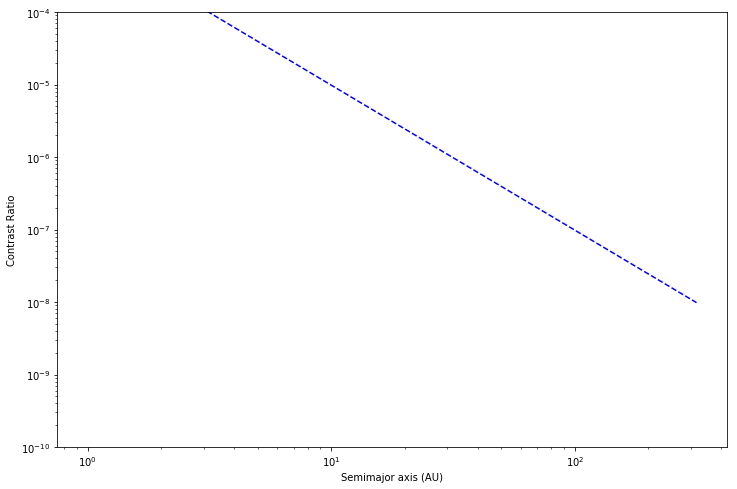

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
#ax.loglog(avals/AU, CRs, 'b')
ax.loglog(avals/AU, CRs[-1]*(avals/avals[-1])**-2, 'b--')
#ax.vlines(swarm.aopt(age)/AU, 1.e-10, 1.e-6, 'r')
ax.set_ylim([1e-10, 1e-4])
ax.set_xlabel('Semimajor axis (AU)')
ax.set_ylabel('Contrast Ratio')

Text(0,0.5,'Contrast Ratio')

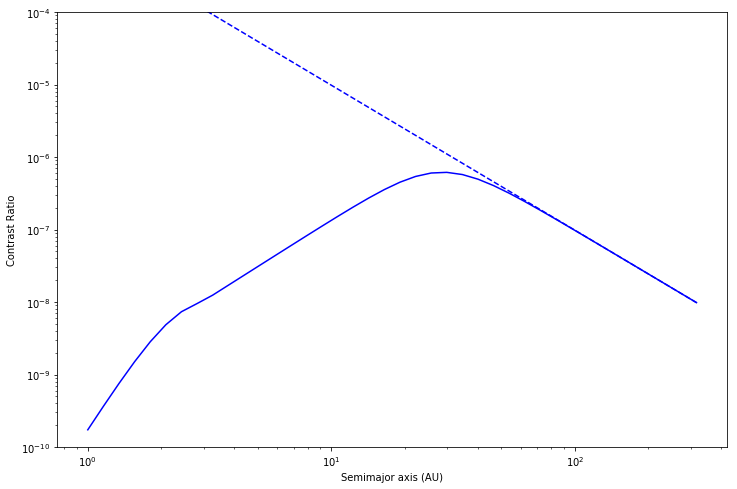

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(avals/AU, CRs, 'b')
ax.loglog(avals/AU, CRs[-1]*(avals/avals[-1])**-2, 'b--')
#ax.vlines(swarm.aopt(age)/AU, 1.e-10, 1.e-6, 'r')
ax.set_ylim([1e-10, 1e-4])
ax.set_xlabel('Semimajor axis (AU)')
ax.set_ylabel('Contrast Ratio')